## Decision Tree Regressor

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataSet/master/ch8_overfit_data.csv')
df.head()

,X,y
0,0.002259,0.516555
1,0.003288,1.049377
2,0.005909,0.696379
3,0.008003,0.964669
4,0.010438,1.340802


## 데이터 확인

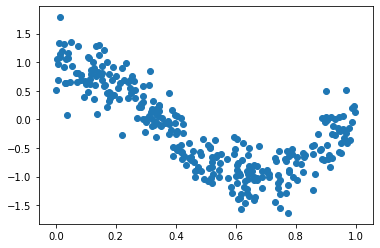

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['y'])

In [3]:
X=df['X'].values.reshape(-1,1)
y=df['y']

## Decision Tree 모듈 불러오기

In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor_3=DecisionTreeRegressor(random_state=42,max_depth=3)
regressor_3.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [5]:
y_hat_3=regressor_3.predict(X)

## 예측값 그래프로 확인

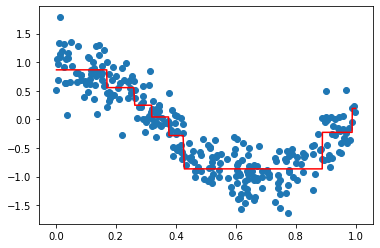

In [6]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_hat_3,color='r')

In [8]:
regressor_6=DecisionTreeRegressor(random_state=42,max_depth=6)
regressor_6.fit(X,y)
y_hat_6=regressor_6.predict(X)

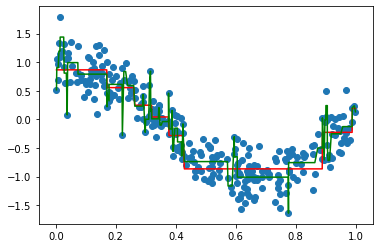

In [9]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_hat_3,color='r')
plt.plot(X,y_hat_6,color='g')

## Cross validation 성능확인

In [10]:
from sklearn.model_selection import KFold,cross_validate
kfold=KFold(n_splits=5)
cross_validate(regressor_3,X,y,cv=kfold)

{'fit_time': array([0.00137067, 0.00132322, 0.00097609, 0.00059247, 0.00058985]),
 'score_time': array([0.00120902, 0.00090551, 0.00055146, 0.000525  , 0.0006237 ]),
 'test_score': array([-1.47523815, -0.50490165, -1.06375759, -0.90151443, -2.09958171])}

In [11]:
cross_validate(regressor_6,X,y,cv=kfold)

{'fit_time': array([0.00226259, 0.00138497, 0.0012219 , 0.00110984, 0.00079513]),
 'score_time': array([0.00165129, 0.00113153, 0.00106001, 0.0006721 , 0.00065613]),
 'test_score': array([-1.22718537, -0.35355585, -1.0768786 , -0.46700178, -1.8670406 ])}

* regression모형과 성능비교하기

## (야구데이터) 데이터 불러오기

In [13]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataSet/master/ch8_hitters_simple.csv')
df=df.dropna()
df.head()

,Hits,HmRun,Runs,RBI,Walks,Years,Salary
1,81,7,24,38,39,14,475.0
2,130,18,66,72,76,3,480.0
3,141,20,65,78,37,11,500.0
4,87,10,39,42,30,2,91.5
5,169,4,74,51,35,11,750.0


In [14]:
features=['Hits','HmRun','Runs','RBI','Walks','Years']
X=df[features]
y=df['Salary']

In [15]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42, max_depth=3)

In [16]:
dtr.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

## 시각화

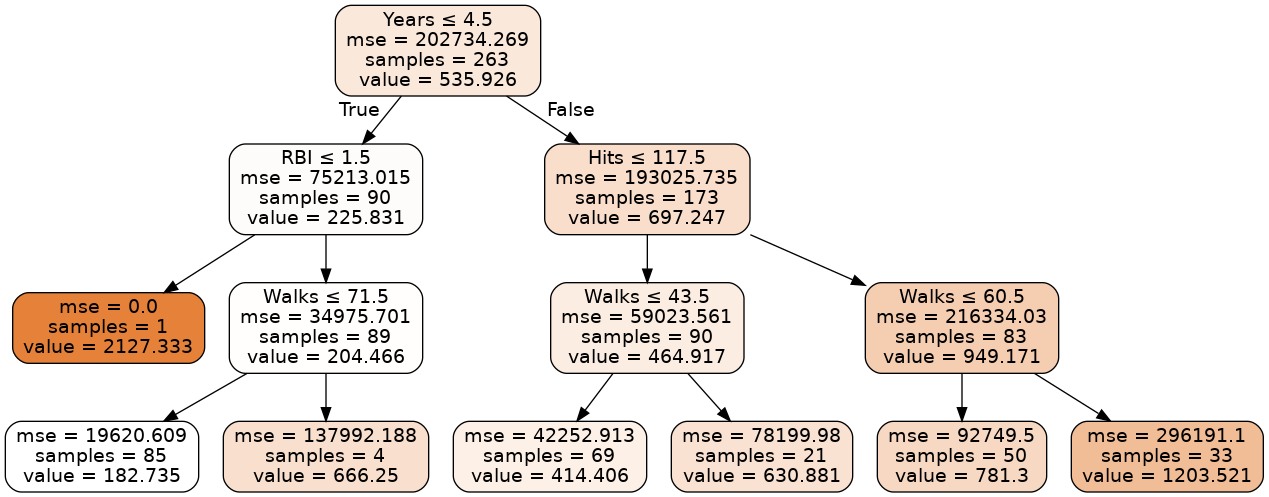

In [20]:
from ch8_graph import graph
graph(dtr,X,y)

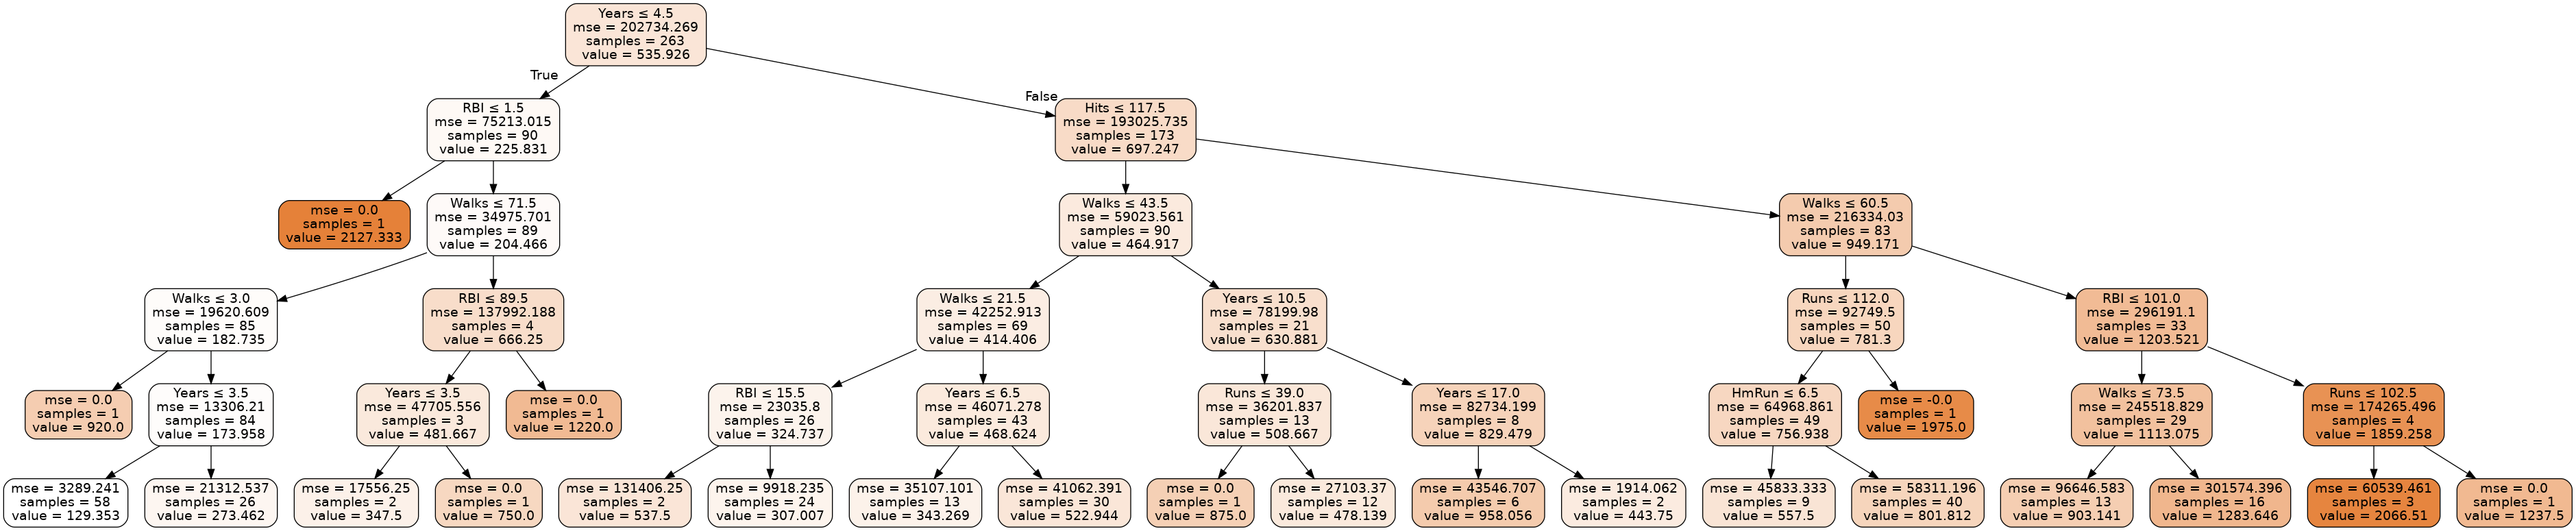

In [21]:
dtr=DecisionTreeRegressor(random_state=42, max_depth=5)
graph(dtr,X,y)

## Classification

In [22]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataSet/master/ch8_heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [23]:
categorical=['ChestPain','Thal','AHD']
df=df.dropna()
df=pd.get_dummies(df,columns=categorical,drop_first=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [24]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

clf=DecisionTreeClassifier()
kfold=KFold(n_splits=5)
cross_validate(clf,X,y,cv=kfold)

{'fit_time': array([0.00927877, 0.00494814, 0.00306797, 0.00282216, 0.00310922]),
 'score_time': array([0.00250292, 0.00133371, 0.00149632, 0.00100803, 0.00105405]),
 'test_score': array([0.7       , 0.73333333, 0.74576271, 0.72881356, 0.69491525])}

## Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
cross_validate(clf,X,y,cv=kfold)

{'fit_time': array([0.00310254, 0.00259709, 0.00274324, 0.00254655, 0.00252557]),
 'score_time': array([0.00119567, 0.00103235, 0.00100303, 0.00092387, 0.00133514]),
 'test_score': array([0.73333333, 0.78333333, 0.69491525, 0.72881356, 0.71186441])}

## Hyper parmater tuning

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [28]:
grid_search

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [29]:
grid_search.fit(X,y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.3min finished
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [31]:
grid_search.best_estimator_
cross_validate(grid_search.best_estimator_,X,y,cv=kfold)

{'fit_time': array([0.16184711, 0.15177393, 0.15378594, 0.15072131, 0.1469357 ]),
 'score_time': array([0.01252913, 0.01516986, 0.0134089 , 0.0175488 , 0.01369953]),
 'test_score': array([0.78333333, 0.93333333, 0.81355932, 0.83050847, 0.81355932])}